In [4]:
import berrylib.util as util

util.setup_nb()
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
t_i = util.simpson_rule(23, -15, 4)

In [6]:
arm_marg = np.array(
    [
        2.14805940e-06,
        5.20029529e-06,
        1.25739898e-05,
        3.03637626e-05,
        7.32228473e-05,
        1.76322015e-04,
        4.23904603e-04,
        1.01719833e-03,
        2.43482842e-03,
        5.80639887e-03,
        1.37544578e-02,
        3.21430446e-02,
        7.29207299e-02,
        1.54663866e-01,
        2.80957961e-01,
        3.58383406e-01,
        2.10323941e-01,
        2.56384277e-02,
        2.10856270e-04,
        5.01093831e-08,
        4.09312478e-13,
        3.22498734e-19,
        7.02837518e-26,
    ]
)

In [7]:
# Assumes that you have t_i.pts and t_i.wts, util.simpson_rule, arm_marg as the density
cdf = []
cdf_pts = []
for i in range(3, t_i.pts.shape[0], 2):
    # Note that t0_rule.wts[:i] will be different from cdf_rule.wts!!
    cdf_rule = util.simpson_rule(i, t_i.pts[0], t_i.pts[i - 1])
    cdf.append(np.sum(arm_marg[:i] * cdf_rule.wts[:i], axis=0))
    cdf_pts.append(t_i.pts[i - 1])
cdf = np.array(cdf)
cdf_pts = np.array(cdf_pts)

In [8]:
def sample_once(should_print=False):
    sample = np.random.uniform()
    last_cdf_idx_below = np.argmin(cdf < sample) - 1
    a = cdf[last_cdf_idx_below]
    b = cdf[last_cdf_idx_below + 1]
    a_frac = -(sample - b) / (b - a)
    b_frac = (sample - a) / (b - a)
    a_pt = cdf_pts[last_cdf_idx_below]
    b_pt = cdf_pts[last_cdf_idx_below + 1]
    interp = a_frac * a_pt + b_frac * b_pt

    if should_print:
        print(f"a={a} b={b} sample={sample}")
        print(f"a_frac={a_frac} b_frac={b_frac} ")
        print(f"a_pt={a_pt} b_pt={b_pt}")
        print(interp)
    return interp


samples = np.array([sample_once() for i in range(10000)])

$$ p(\theta_{-i} | )

In [9]:
# This didn't really work for two reasons:
# 1. The Cubic spline fit was kind of sad with so few points in the PDF/CDF
# 2. The scipy.stats.rv_continuous implementation seems to be doing some kind
#    of internal stuff to sample from a provided CDF. This doesn't work well when
#    you call an interpolation function inside.
# There's room for improvement by integrating the CDF better. Right now, we
# lose half our PDF points in the integration process. This is not necessary!!

# cubic_interp = scipy.interpolate.CubicHermiteSpline(cdf_pts, cdf, arm_marg[3::2])
# import scipy.stats
# import scipy.interpolate
# class MyRandomVariableClass(scipy.stats.rv_continuous):
#     def __init__(self, xtol=1e-14, seed=None):
#         super().__init__(a=0, xtol=xtol, seed=seed)
#         scipy.interpolate.CubicSpline(cdf_pts, cdf)

#     def _cdf(self, x):
#         return cubic_interp(x)
# samples = MyRandomVariableClass().rvs(size=1000)
# xs = np.linspace(-7.5, 1.0, 40)
# plt.plot(xs, cubic_interp(xs), 'b-o')

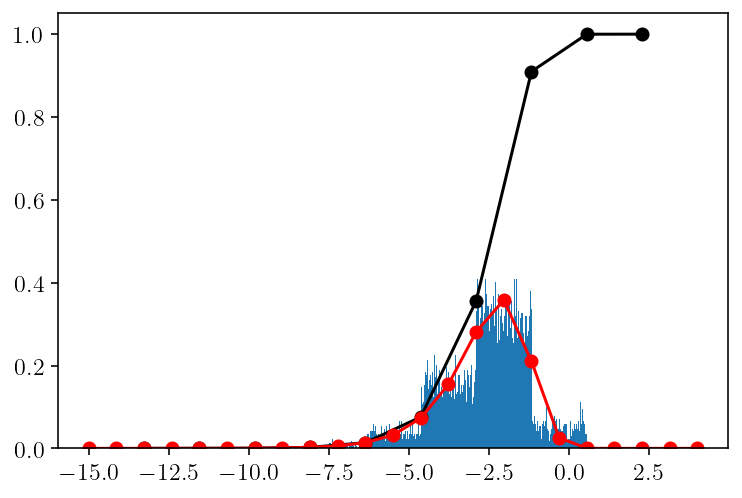

In [10]:
import matplotlib.pyplot as plt

plt.plot(cdf_pts, cdf, "k-o")
plt.plot(t_i.pts, arm_marg, "r-o")
plt.hist(samples, bins=np.linspace(-7.5, 1.0, 500), density=True)
plt.show()